# FITS - Flexible Image Transport System

A basic tutorial on pyfits can be found here:
https://pythonhosted.org/pyfits/index.html#quick-tutorial

A basic fits file will consist of a *header* and a data *table*. The data tables can be an image, or a spectrum. The header will have *keywords* that give details of the observation such as date and time, telescope used, dimensions and descriptions of the data tables etc.

First we import the pyfits module.  I am using it as part of a package called astropy (http://www.astropy.org/) but it is also available as a stand-alone package from the above website.  The functionality is basically the same but there may be small differences in keywords.

In [6]:
from astropy.io import fits as pyfits
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
hdulist = pyfits.open('data/G0096_67/2006d272/2006d272_16h21m02s_Spec_sharmila_G9.62+0.20.fits')


pyfits.open returns an HDUList object, which will consist of a list of **Header Data Units**.

In [8]:
hdulist

In [9]:
ls *.fits

ls: *.fits: No such file or directory


In [10]:
hdulist.info()

Filename: data/G0096_67/2006d272/2006d272_16h21m02s_Spec_sharmila_G9.62+0.20.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      41   ()              
1    04.5S       BinTableHDU     60   1R x 13C     [1D, 1D, 1D, 8A, 1D, 8A, 1D, 27A, 1D, 1D, 28A, 1D, 1D]   
2    Spectra     BinTableHDU     30   1025R x 3C   [1E, 1E, 1E]   
3    Chart       BinTableHDU     37   374R x 3C    [1D, 1D, 1D]   


There are 4 HDUs. We can have a look at what is in each hdu. Note that python indexes count from 0.

If you have had a look at the continuum driftscan observations, you will note that the specral line observation files look a little different.

In [11]:
hdu0 = hdulist[0]
hdu0.header

SIMPLE  =                    T                                                  
BITPIX  =                    8                                                  
NAXIS   =                    0                                                  
EXTEND  =                    T                                                  
DATE    = '2006-09-29T16:21:02' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
COMMENT information about the object, from scheduler task                       
OBJECT  = 'G9.62+0.20'         / Name of object                                 
LONGITUD=     270.816583333333 / Longitude of object                            
LATITUDE=    -20.5313611111111 / Latitude of object                             
EQUINOX =                1950.                                                  
COMMENT information about the scan, from scheduler task                         
OBSERVER= 'S. GOEDHART'        / Principal Investigator                         
OBSLOCAL= 'sharmila'        

The primary HDU contains all the details of the observation.

Not that scantype is 'spectrum'.

There are additional keywords that tell us about the observation.
The spectrometer bandwidth is 1 MHz and there are 1024 channels.  The observation is frequency switched with an offset of 0.5 MHz.  There is no position switching being done.  The total integration time is 450 seconds.  This is not a pointing observation.

In [12]:
hdu1 = hdulist[1]
hdu1.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  143 / width of table in bytes                        
NAXIS2  =                    1 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   13 / number of fields in each row                   
EXTNAME = '04.5S   '           / name of this binary table extension            
FEEDTYPE= 'Diagonal'           / Feedtype                                       
BMOFFHA =               -0.512 / Beam offset in HA                              
BMOFFDEC=                 0.01 / Beam offset in Dec                             
HPBW    =                0.1

In [13]:
print hdu1.columns

ColDefs(
    name = 'PSS_Value'; format = '1D'; unit = 'Jy/K'; disp = 'D11.4'
    name = 'PSS_Sigma'; format = '1D'; unit = 'Jy/K'; disp = 'D11.4'
    name = 'PSS_Freq'; format = '1D'; unit = 'MHz'; disp = 'D12.5'
    name = 'PSS_Date'; format = '8A'
    name = 'PSS_BW'; format = '1D'; unit = 'MHz'; disp = 'D11.4'
    name = 'PSS_Source'; format = '8A'
    name = 'PSS_Flux'; format = '1D'; unit = 'Jy'; disp = 'D11.4'
    name = 'Feedsys'; format = '27A'
    name = 'FeedSys_RF_Hi'; format = '1D'; disp = 'D12.5'
    name = 'FeedSys_RF_Lo'; format = '1D'; disp = 'D12.5'
    name = 'Mixer'; format = '28A'
    name = 'Mixer_RF_Lo'; format = '1D'; unit = 'MHz'; disp = 'D12.5'
    name = 'Mixer_RF_Hi'; format = '1D'; unit = 'MHz'; disp = 'D12.5'
)


In [14]:
print hdu1.data

[ (15.73, 0.25, 6670.0, '19990131', 7.0, 'B0915-11', 9.9900000000000002, '4.5cm Single Feed Cryogenic', 6900.0, 5900.0, '4.5cm Narrowband Mixer Chain', 6170.0, 6800.0)]


This table contains information about the signal chain and the feed selected. Note that the PSS (Point Source Sensitivity) has never been updated.

Now we get to the stuff we are really interested in - the spectral line data!

In [15]:
hdu2 = hdulist[2]
hdu2.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   12 / width of table in bytes                        
NAXIS2  =                 1025 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    3 / number of fields in each row                   
EXTNAME = 'Spectra '           / name of this binary table extension            
FRONTEND= '04.5S   '           / Frontend ID                                    
CENTFREQ=             6668.018 / [MHz] Backend centre frequency                 
BANDWDTH=                   1. / [MHz] Bandwidth of backend                     
TCAL1   =                 14

In [16]:
print hdu2.columns

ColDefs(
    name = 'Vlsr'; format = '1E'; unit = 'km/s'
    name = 'Polstate1'; format = '1E'; unit = 'Kelvins'
    name = 'Polstate4'; format = '1E'; unit = 'Kelvins'
)


In [17]:
hdu2.header['TUNIT2']

'Kelvins'

Polstate1 and Polstate4 correspond to left and right (respectively) circular polarisation.  Note that some spectrometers will produce full polarisation products and will have cross-correlations between polarisations in order to produce full Stokes informations.

In [18]:
print hdu2.data

[(-8.783, 27.012421, 28.157982) (-8.7390976, 27.693527, 28.255112)
 (-8.6951952, 27.054628, 28.172375) ..., (36.085587, 28.138084, 29.299507)
 (36.129486, 27.89847, 29.967812) (36.173389, 28.653698, 28.768848)]


In [19]:
hdu2.data['Vlsr']

array([ -8.78299999,  -8.7390976 ,  -8.6951952 , ...,  36.08558655,
        36.12948608,  36.17338943], dtype=float32)

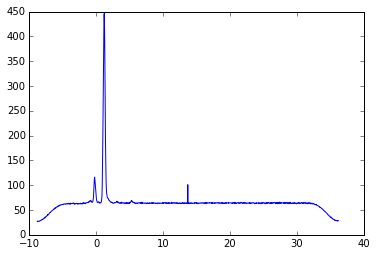

In [20]:
plt.plot(hdu2.data['Vlsr'], hdu2.data['Polstate1'])

Note that when you ask ipython to print out large arrays, it will show the first and last few rows and print ellipses (...) to indicate that is has left out data.

Now, what have we got in the last hdu?

In [21]:
hdu3 = hdulist[3]
hdu3.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   24 / width of table in bytes                        
NAXIS2  =                  374 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    3 / number of fields in each row                   
EXTNAME = 'Chart   '           / name of this binary table extension            
FRONTEND= '04.5S   '           / Frontend ID                                    
CENTFREQ=             6668.018 / [MHz] Backend centre frequency                 
BANDWDTH=                   4. / [MHz] Bandwidth of backend                     
TCAL1   =                 14

Ah, this looks like the noise diode calibration block. We've spoken about this in the section on continuum driftscans.